In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
df=pd.read_csv('train.csv')
df['date']=pd.to_datetime(dict(year=df.year,month=df.month,day=df.day))
date=df.pop('date')
df.insert(0,'date',date)
df.isnull().sum()

date             0
year             0
month            0
day              0
latitude         0
longitude        0
zon.winds    14570
mer.winds    14570
humidity     38794
air temp.     7838
s.s.temp.        0
dtype: int64

In [102]:
df.sort_values(['date'],inplace=True)
df.reset_index(inplace=True,drop=True)
df.set_index('date',inplace=True)
df.dropna(subset=['air temp.'],inplace=True)
df['zon.winds'].fillna(np.random.normal(-3.505847,3.222261),inplace=True)
df['mer.winds'].fillna(np.random.normal(0.451069,2.927329),inplace=True)
df['humidity'].fillna(np.random.normal(81.267260,5.363381),inplace=True)


In [103]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,KBinsDiscretizer, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [105]:
tss=TimeSeriesSplit(n_splits=3)
for train,test in tss.split(x):
    x_train,x_test=x.iloc[train,:],x.iloc[test,:]
    y_train,y_test=y.iloc[train],y.iloc[test]

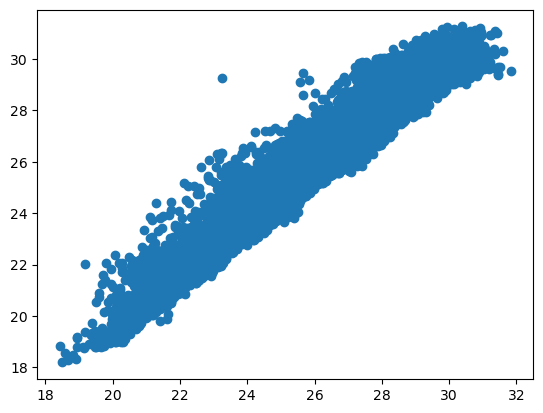

In [106]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',LinearRegression())])
mod=GridSearchCV(estimator=mod,
                 param_grid={},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [107]:
mean_absolute_error(y_test,pred)

0.43088856791121427

In [108]:
root_mean_squared_error(y_test,pred)

0.5694029944459054

In [109]:
r2_score(y_test,pred)

0.9397168830708291

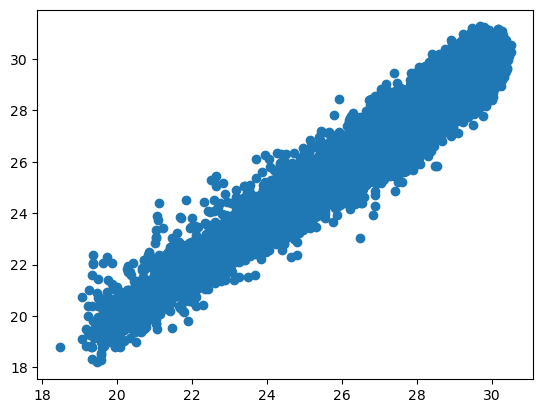

In [110]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',KNeighborsRegressor())])
mod=GridSearchCV(estimator=mod,
                 param_grid={},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [111]:
mean_absolute_error(y_test,pred)

0.4440597299312402

In [112]:
root_mean_squared_error(y_test,pred)

0.5693781117860918

In [113]:
r2_score(y_test,pred)

0.9397221516469727

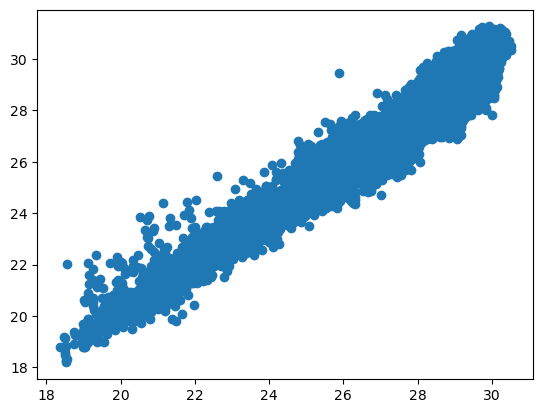

In [114]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',RandomForestRegressor())])
mod=GridSearchCV(estimator=mod,
                 param_grid={},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [115]:
mean_absolute_error(y_test,pred)

0.3880456383066856

In [116]:
root_mean_squared_error(y_test,pred)

0.5053097286104328

In [117]:
r2_score(y_test,pred)

0.9525242837781187

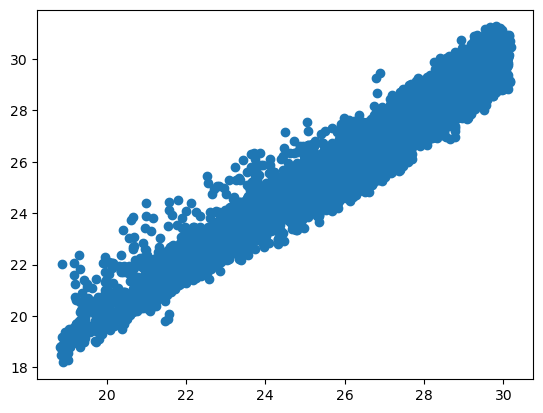

In [118]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',GradientBoostingRegressor())])
mod=GridSearchCV(estimator=mod,
                 param_grid={},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [119]:
mean_absolute_error(y_test,pred)

0.3952731218112942

In [120]:
root_mean_squared_error(y_test,pred)

0.5057111075729986

In [121]:
r2_score(y_test,pred)

0.9524488317499734